In [1]:
from contextlib import contextmanager
from pathlib import Path

from pymol import cmd, finish_launching
from gcszhn_plugin import __init_plugin__
from gcszhn_plugin.pdb import *
import matplotlib.pyplot as plt
finish_launching()
__init_plugin__()

In [47]:
cmd.delete('all')
obj_name = '1HM5'
force_reload = False
sess = Path(f'{obj_name}.pse')
if force_reload and sess.exists():
    sess.unlink()
if sess.exists():
    cmd.load(str(sess))
else:
    assert cmd.fetch(obj_name) == obj_name
    cmd.extract('water', 'resn HOH')
    cmd.h_add('water')
    cmd.save(obj_name + '.pdb')

In [25]:
def plot_hist(
        name: str, 
        selection: str='(all)', 
        property: str = 'b',
        minimum: float=None, 
        maximum: float=None,
        bins: int=100):
    if minimum is None:
        minimum = -float('inf')
    if maximum is None:
        maximum = float('inf')
    bfactors = [min(maximum, max(minimum, getattr(atom, property))) for atom in cmd.get_model(selection).atom]
    print("Minimum: %f, Maximum: %f" % (min(bfactors), max(bfactors)))
    plt.hist(bfactors, bins=bins)
    plt.xlabel(name)
    plt.ylabel('frequency')
    plt.show()


def bfactors(selection='(all)')->list:
    return [atom.b for atom in cmd.get_model(selection).atom]


def show(selection='(all)'):
    if selection != '(all)':
        cmd.hide(selection='(all)')
    cmd.show(selection=selection, representation='cartoon')
    cmd.show_as(selection='resn HOH', representation='lines')


@contextmanager
def show_only(selection='(all)'):
    show(selection)
    yield selection
    show()


def save_png(selection='(all)', width=900, height=900, dpi=300, transparent=True):
    ray_opaque_background = cmd.get('ray_opaque_background')
    if transparent and ray_opaque_background != 'off':
        cmd.set('ray_opaque_background', 'off')
    with show_only(selection):
        cmd.png(f'{selection}.png', width=width, height=height, ray=1, dpi=dpi)
        cmd.set('ray_opaque_background', ray_opaque_background)

In [61]:
target_obj_name = f'{obj_name}_hydro_no_sasa'

In [34]:
cmd.copy(target_obj_name, obj_name)
set_hydro_color_v2(
    with_sasa=False, 
    selection=target_obj_name,
    level='R')

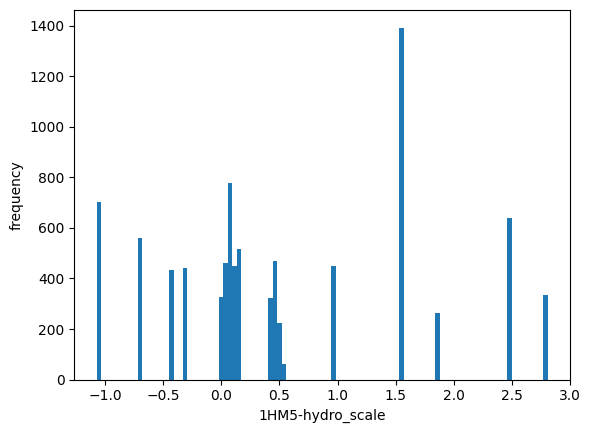

In [62]:
save_png(target_obj_name)
plot_hist(f'{obj_name}-hydro_scale', target_obj_name)

In [59]:
target_obj_name = f'{obj_name}_hydro_sasa'

In [37]:
cmd.copy(target_obj_name, obj_name)
set_hydro_color_v2(
    with_sasa=True, 
    selection=target_obj_name,
    level='R')

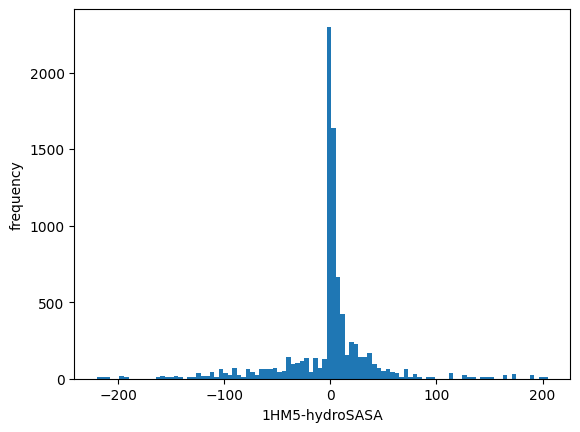

In [60]:
save_png(target_obj_name)
plot_hist(f'{obj_name}-hydroSASA', target_obj_name)

In [56]:
target_obj_name = f'{obj_name}_sasa'

In [40]:
cmd.copy(target_obj_name, obj_name)
set_sasa_color(
    selection=target_obj_name,
    level='R')

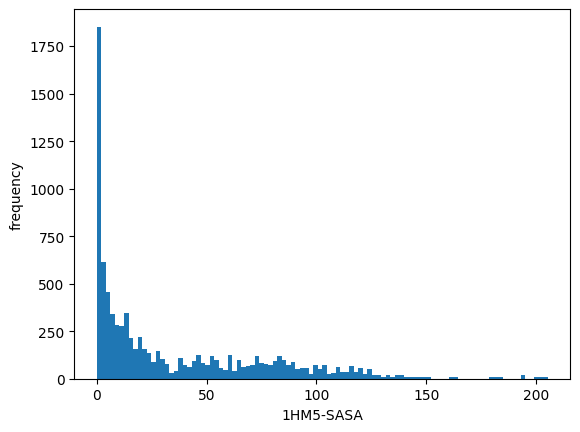

In [58]:
save_png(target_obj_name)
plot_hist(f'{obj_name}-SASA', target_obj_name)

In [49]:
target_obj_name = f'{obj_name}_hydration'

In [43]:
cmd.copy(target_obj_name, obj_name)
radius = 2.8
# cmd.extract(
#     'hydration_water',
#     f'byres (resn HOH) within {radius} of ({target_obj_name} and elem N+O)')
set_hydration_color(target_obj_name, radius=radius)

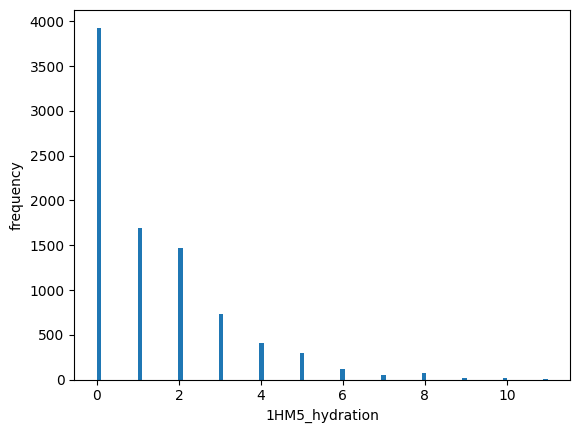

In [50]:
save_png(target_obj_name)
plot_hist(f'{obj_name}_hydration', target_obj_name)

In [45]:
cmd.save(f'{obj_name}.pse')